In [205]:
%matplotlib inline
import pandas as pd
import numpy as np
import geocoder
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
plt.style.use('classic')
from datetime import datetime
import seaborn as sns
from statsmodels.stats.weightstats import ztest as ztest

In [96]:
moscow=pd.read_csv('moscow.csv')
moscow.head()

,bib,finish_time_sec,finish_time_result,race,pace_sec,pace(minpkm),pace(kmph),half_pace_sec,half_pace(minpkm),half_pace(kmph),gender_en,age,name_en,location_city_ru,location_city_en,country_code_alpha_3,flag_DNF,flag_all_split_exist,race_uniform_index
0,1,8911.0,2h 28min 31sec,42.195 km,211.186159,3:31 min/km,17.0 km/h,208.318521,3:28 min/km,17.3 km/h,Female,30,Sardana Trofimova,Якутск,Yakutsk,RUS,0,1,0.000133
1,2,9308.0,2h 35min 08sec,42.195 km,220.594857,3:40 min/km,16.3 km/h,212.157839,3:32 min/km,17.0 km/h,Female,35,Tat'yana Arkhipova,Чебоксары,Cheboksary,RUS,0,1,0.002556
2,3,8122.0,2h 15min 22sec,42.195 km,192.487262,3:12 min/km,18.7 km/h,189.880318,3:09 min/km,19.0 km/h,Male,31,Stepan Kiselev,Казань,Kazan',RUS,0,1,0.000397
3,4,8467.0,2h 21min 07sec,42.195 km,200.663586,3:20 min/km,17.9 km/h,186.894182,3:06 min/km,19.3 km/h,Male,36,Dmitriy Safronov,Москва,Moskva,RUS,0,1,0.009003
4,5,8738.0,2h 25min 38sec,42.195 km,207.086148,3:27 min/km,17.4 km/h,194.904610,3:14 min/km,18.5 km/h,Male,42,Grigoriy Andreev,Уфа,Ufa,RUS,0,1,0.006439


In [ ]:
moscow['time_hours']=moscow['finish_time_sec']/3600

In [125]:
moscow.isnull().sum()
moscow.dropna(inplace=True) 

In [126]:
mscw=moscow[(moscow['race']=='42.195 km')]

In [130]:
mscw=mscw.sort_values(by='finish_time_sec')

In [131]:
codes=pd.read_csv('country_codes.csv')
codes.rename(columns={'alpha-3':'country_code_alpha_3'},inplace=True)

In [132]:
codes_mscw = pd.merge(mscw, codes, how='inner', on = 'country_code_alpha_3')
codes_mscw.columns

Index(['bib', 'finish_time_sec', 'finish_time_result', 'race', 'pace_sec',
       'pace(minpkm)', 'pace(kmph)', 'half_pace_sec', 'half_pace(minpkm)',
       'half_pace(kmph)', 'gender_en', 'age', 'name_en', 'location_city_ru',
       'location_city_en', 'country_code_alpha_3', 'flag_DNF',
       'flag_all_split_exist', 'race_uniform_index', 'quartile', 'time_hours',
       'name', 'alpha-2', 'country-code', 'iso_3166-2', 'region', 'sub-region',
       'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code'],
      dtype='object')

In [133]:
countrytally=codes_mscw.groupby('name').count()
countrytally

,bib,finish_time_sec,finish_time_result,race,pace_sec,pace(minpkm),pace(kmph),half_pace_sec,half_pace(minpkm),half_pace(kmph),...,time_hours,alpha-2,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
name,,,,,,,,,,,,,,,,,,,,,
Australia,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,0,4,4,0
Austria,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,0,8,8,0
Azerbaijan,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,0,2,2,0
Belarus,45,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,0,45,45,0
Belgium,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,0
Bosnia and Herzegovina,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,0,11,11,0
Brazil,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Canada,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,0
China,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,0,51,51,0


### EL MARATÓN DE MOSCÚ 🇷🇺

Pronto correré mi primer maratón y me dí a la tarea de analizar datos de un maratón pasado que puedan darme algunos tips. Veamos...

In [116]:
codes_mscw.to_csv('mscw.csv')

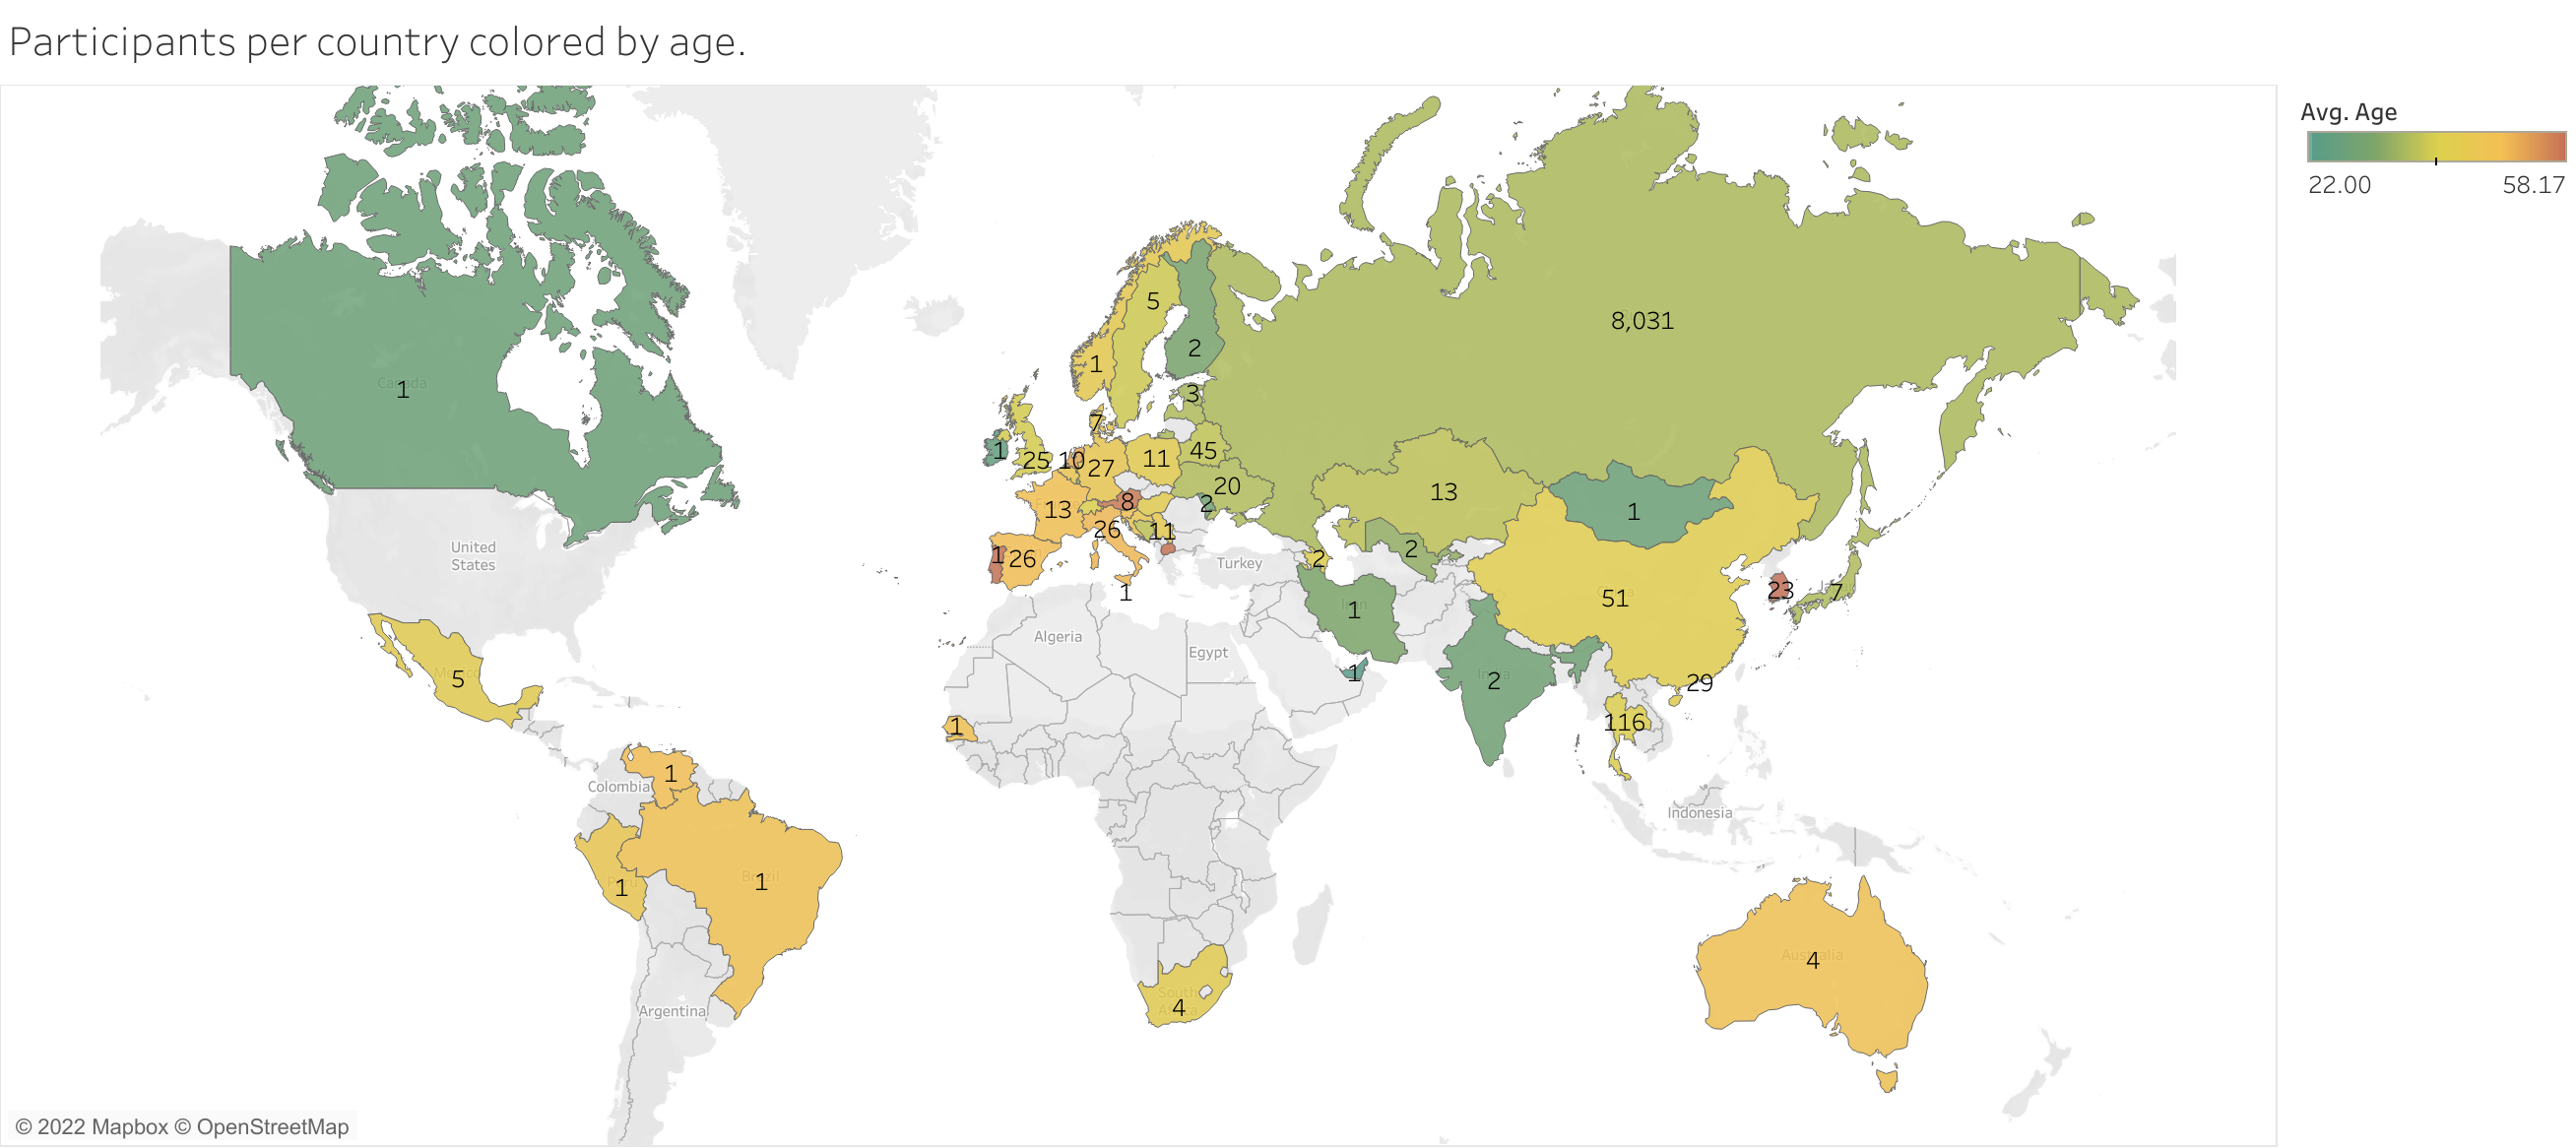

In [283]:
codes_mscw['time_hours'].describe()

count    8604.000000
mean        4.157785
std         0.705300
min         2.256111
25%         3.659444
50%         4.056111
75%         4.589236
max         6.297778
Name: time_hours, dtype: float64

### Visualicemos la distribución de los tiempos finales de los participantes...

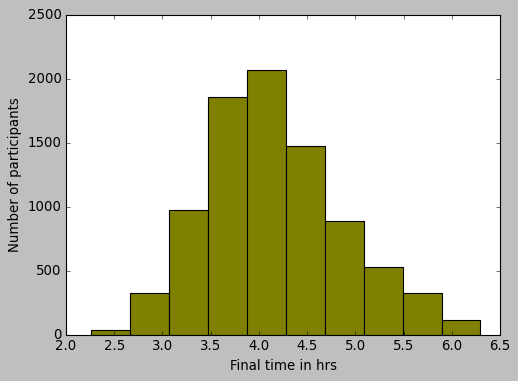

In [309]:
plt.figure(figsize=(7,5))
plt.hist(mscw['time_hours'],color='olive')
plt.ylabel('Number of participants')
plt.xlabel('Final time in hrs')
plt.show()

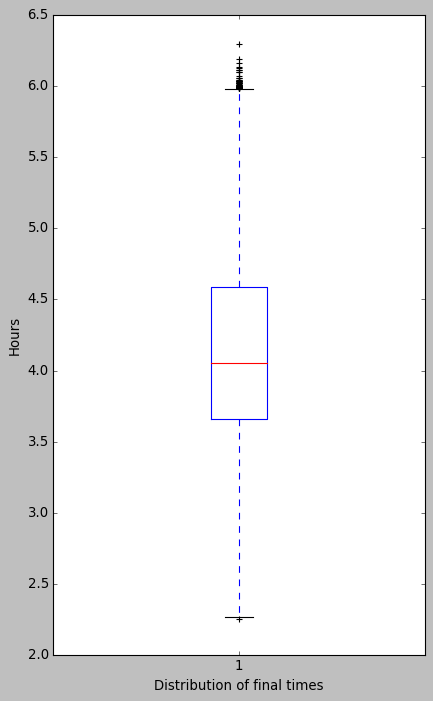

In [325]:
plt.figure(figsize=(6,10))
plt.boxplot(mscw['time_hours'])
plt.show
plt.ylabel('Hours')
plt.xlabel('Distribution of final times')
plt.show()

In [128]:
moscow['quartile']=np.where(moscow['finish_time_sec']>16521,'Q4',(np.where(moscow['finish_time_sec']>14602,'Q3',(np.where(moscow['finish_time_sec']>13175,'Q2','Q1')))))

## Pasito Tuntún...🏃🏾

Veamos que tal está el ritmo de los participantes:

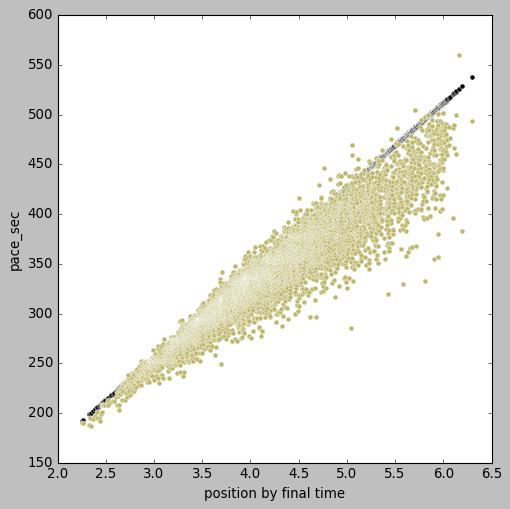

In [324]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=mscw, x="time_hours", y="pace_sec",color='black').set(xlabel='position by final time')
sns.scatterplot(data=mscw, x="time_hours", y="half_pace_sec", color='darkkhaki')#.set(ylim=(0, 6.5))
plt.show()

### Veamos datos de otro maratón

Aunque los siguientes datos no pertenecen al maratón de Moscú del 2018, el comportamiento observado es replicable en otros maratones. 

### HONG KONG 🇭🇰

In [299]:
hk=pd.read_csv('run1.csv')
hk.isnull().sum()
hk.dropna(inplace=True) 
hk['OfficialTime']=hk['Official Time'].astype('datetime64[ns]')
hk['Net Time']=hk['Net Time'].astype('datetime64[ns]')
hk['10km Time']=hk['10km Time'].astype('datetime64[ns]')
hk['Half Way Time']=hk['Half Way Time'].astype('datetime64[ns]')
hk['30km Time']=hk['30km Time'].astype('datetime64[ns]')
hk['10']=hk['10km Time'].astype(int)
hk['10seconds']=(hk['10']-1663200000000000000)/1000000000
hk['10ktimes']=hk['10seconds']/3600
hk['half']=hk['Half Way Time'].astype(int)
hk['halfseconds']=(hk['half']-1663200000000000000)/1000000000
hk['halftimes']=hk['halfseconds']/3600
hk['30']=hk['30km Time'].astype(int)
hk['30seconds']=(hk['30']-1663200000000000000)/1000000000
hk['30ktimes']=hk['30seconds']/3600
hk['ot']=hk['OfficialTime'].astype(int)
hk['otseconds']=(hk['ot']-1663200000000000000)/1000000000
hk['finaltimes']=hk['otseconds']/3600
china=hk[(hk['Country ']=='China')]

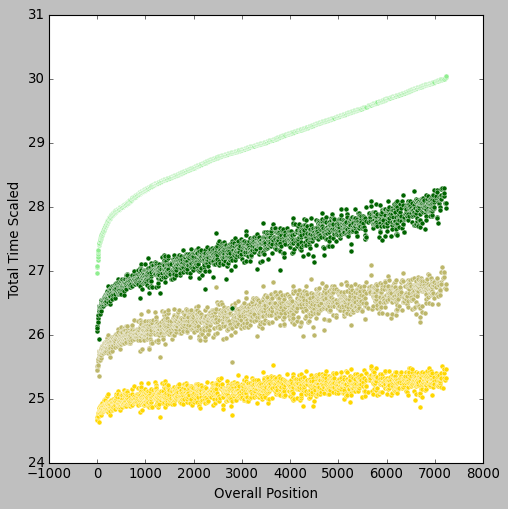

In [323]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=china, x="Overall Position", y="10ktimes",color='gold').set(ylabel='Total Time Scaled')
sns.scatterplot(data=china, x="Overall Position", y="halftimes", color='darkkhaki')#.set(ylim=(0, 6.5))
sns.scatterplot(data=china, x="Overall Position", y="30ktimes",color='darkgreen')#.set(ylim=(0, 6.5))
sns.scatterplot(data=china, x="Overall Position", y="finaltimes",color='lightgreen')#.set(ylim=(0, 6.5))
plt.show()


### Back to the Kremilin...💂

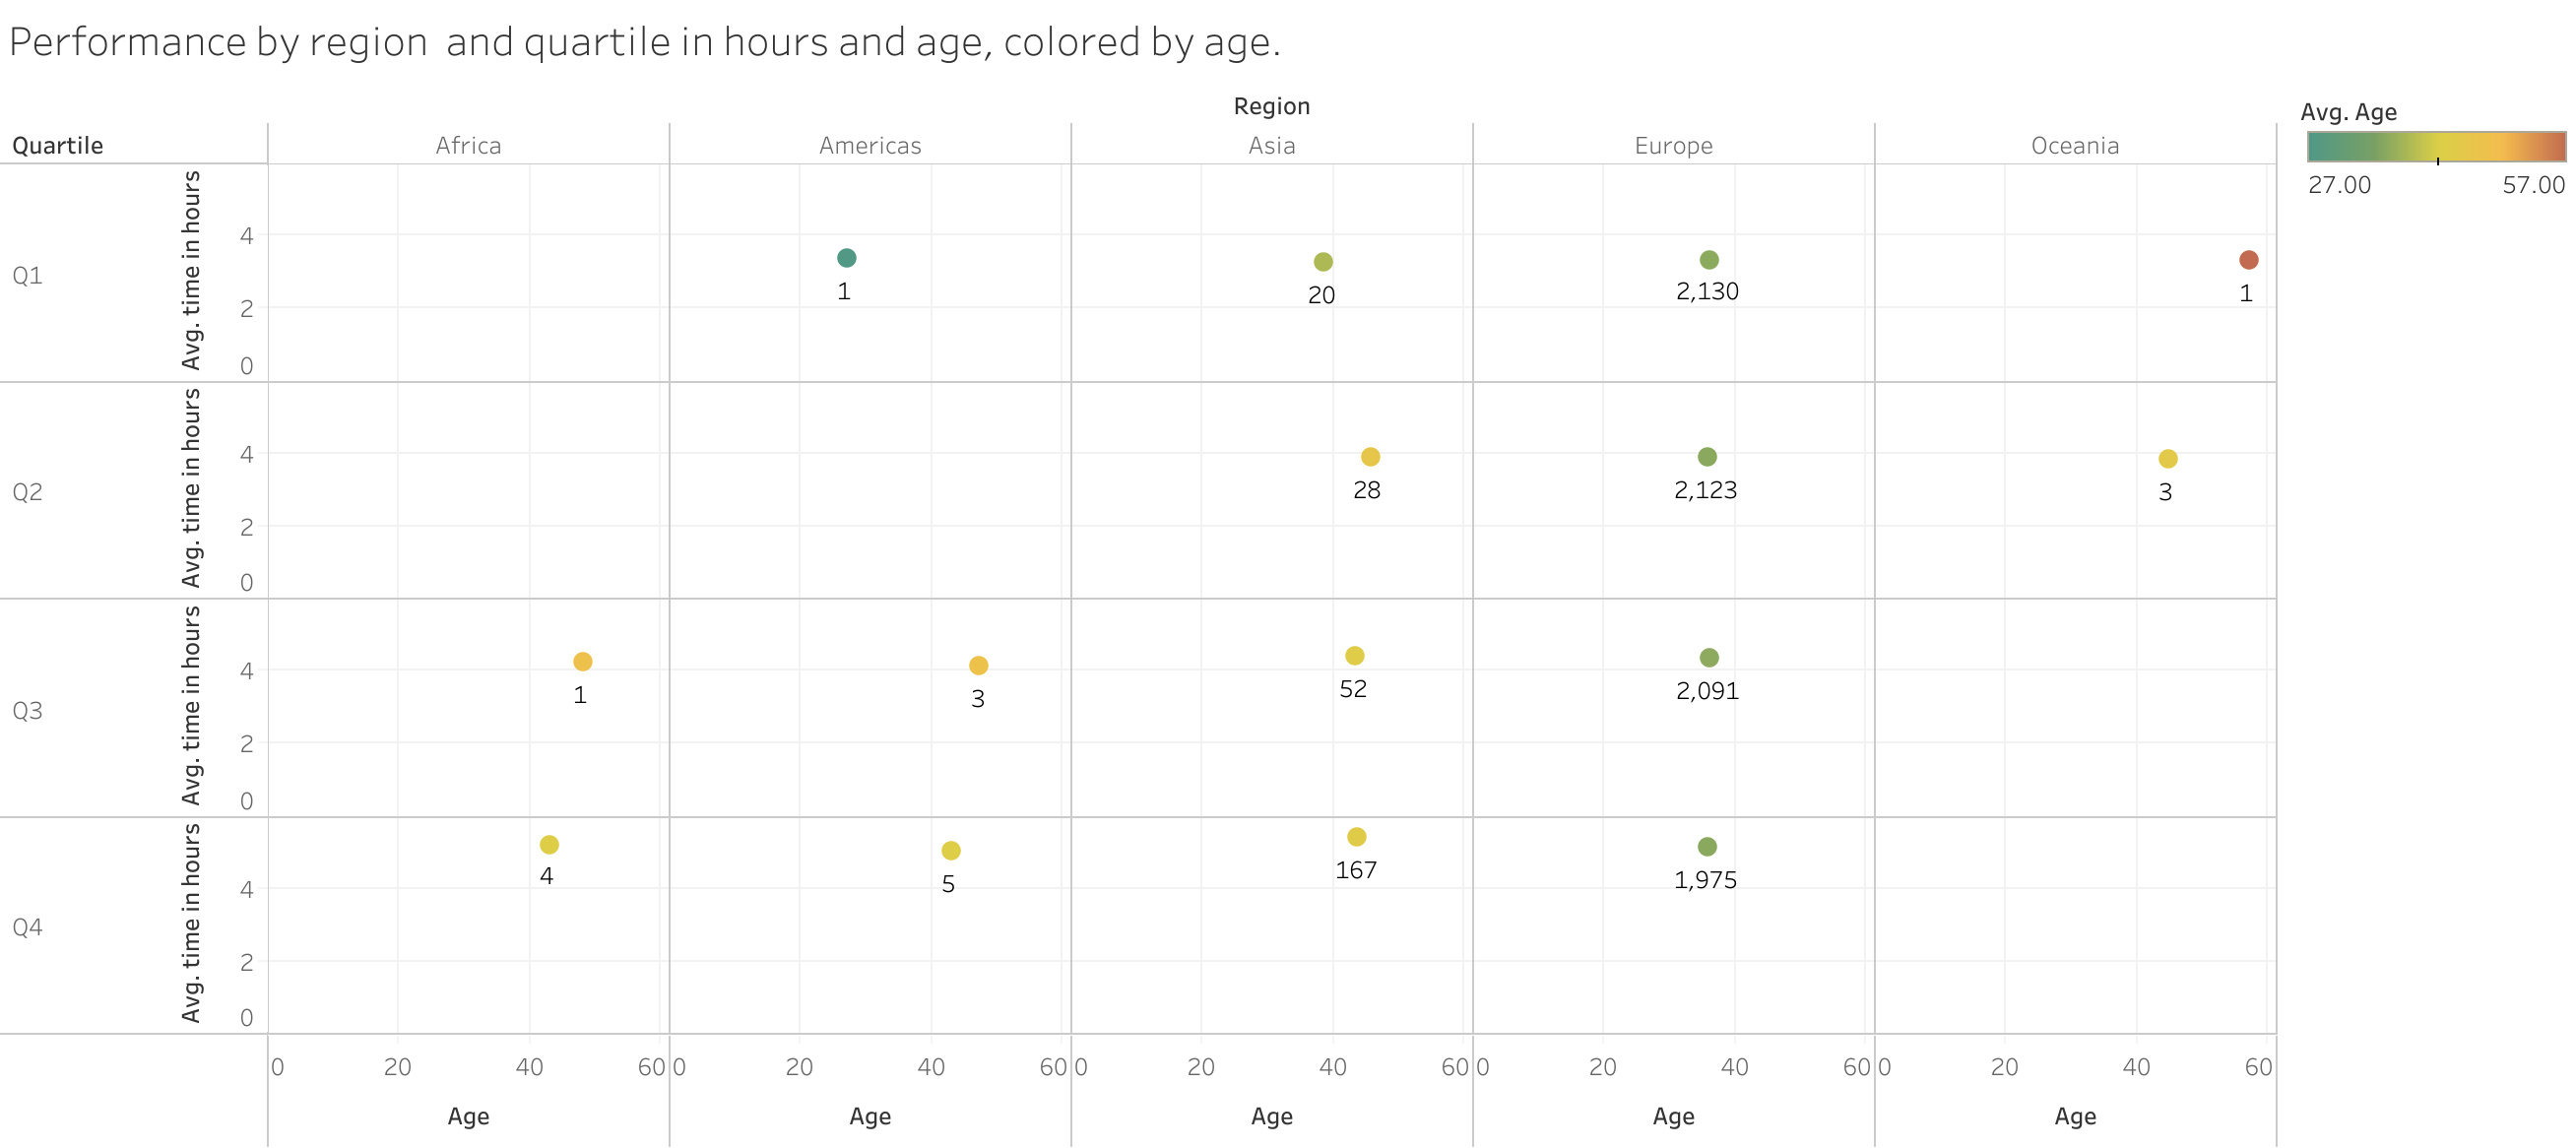

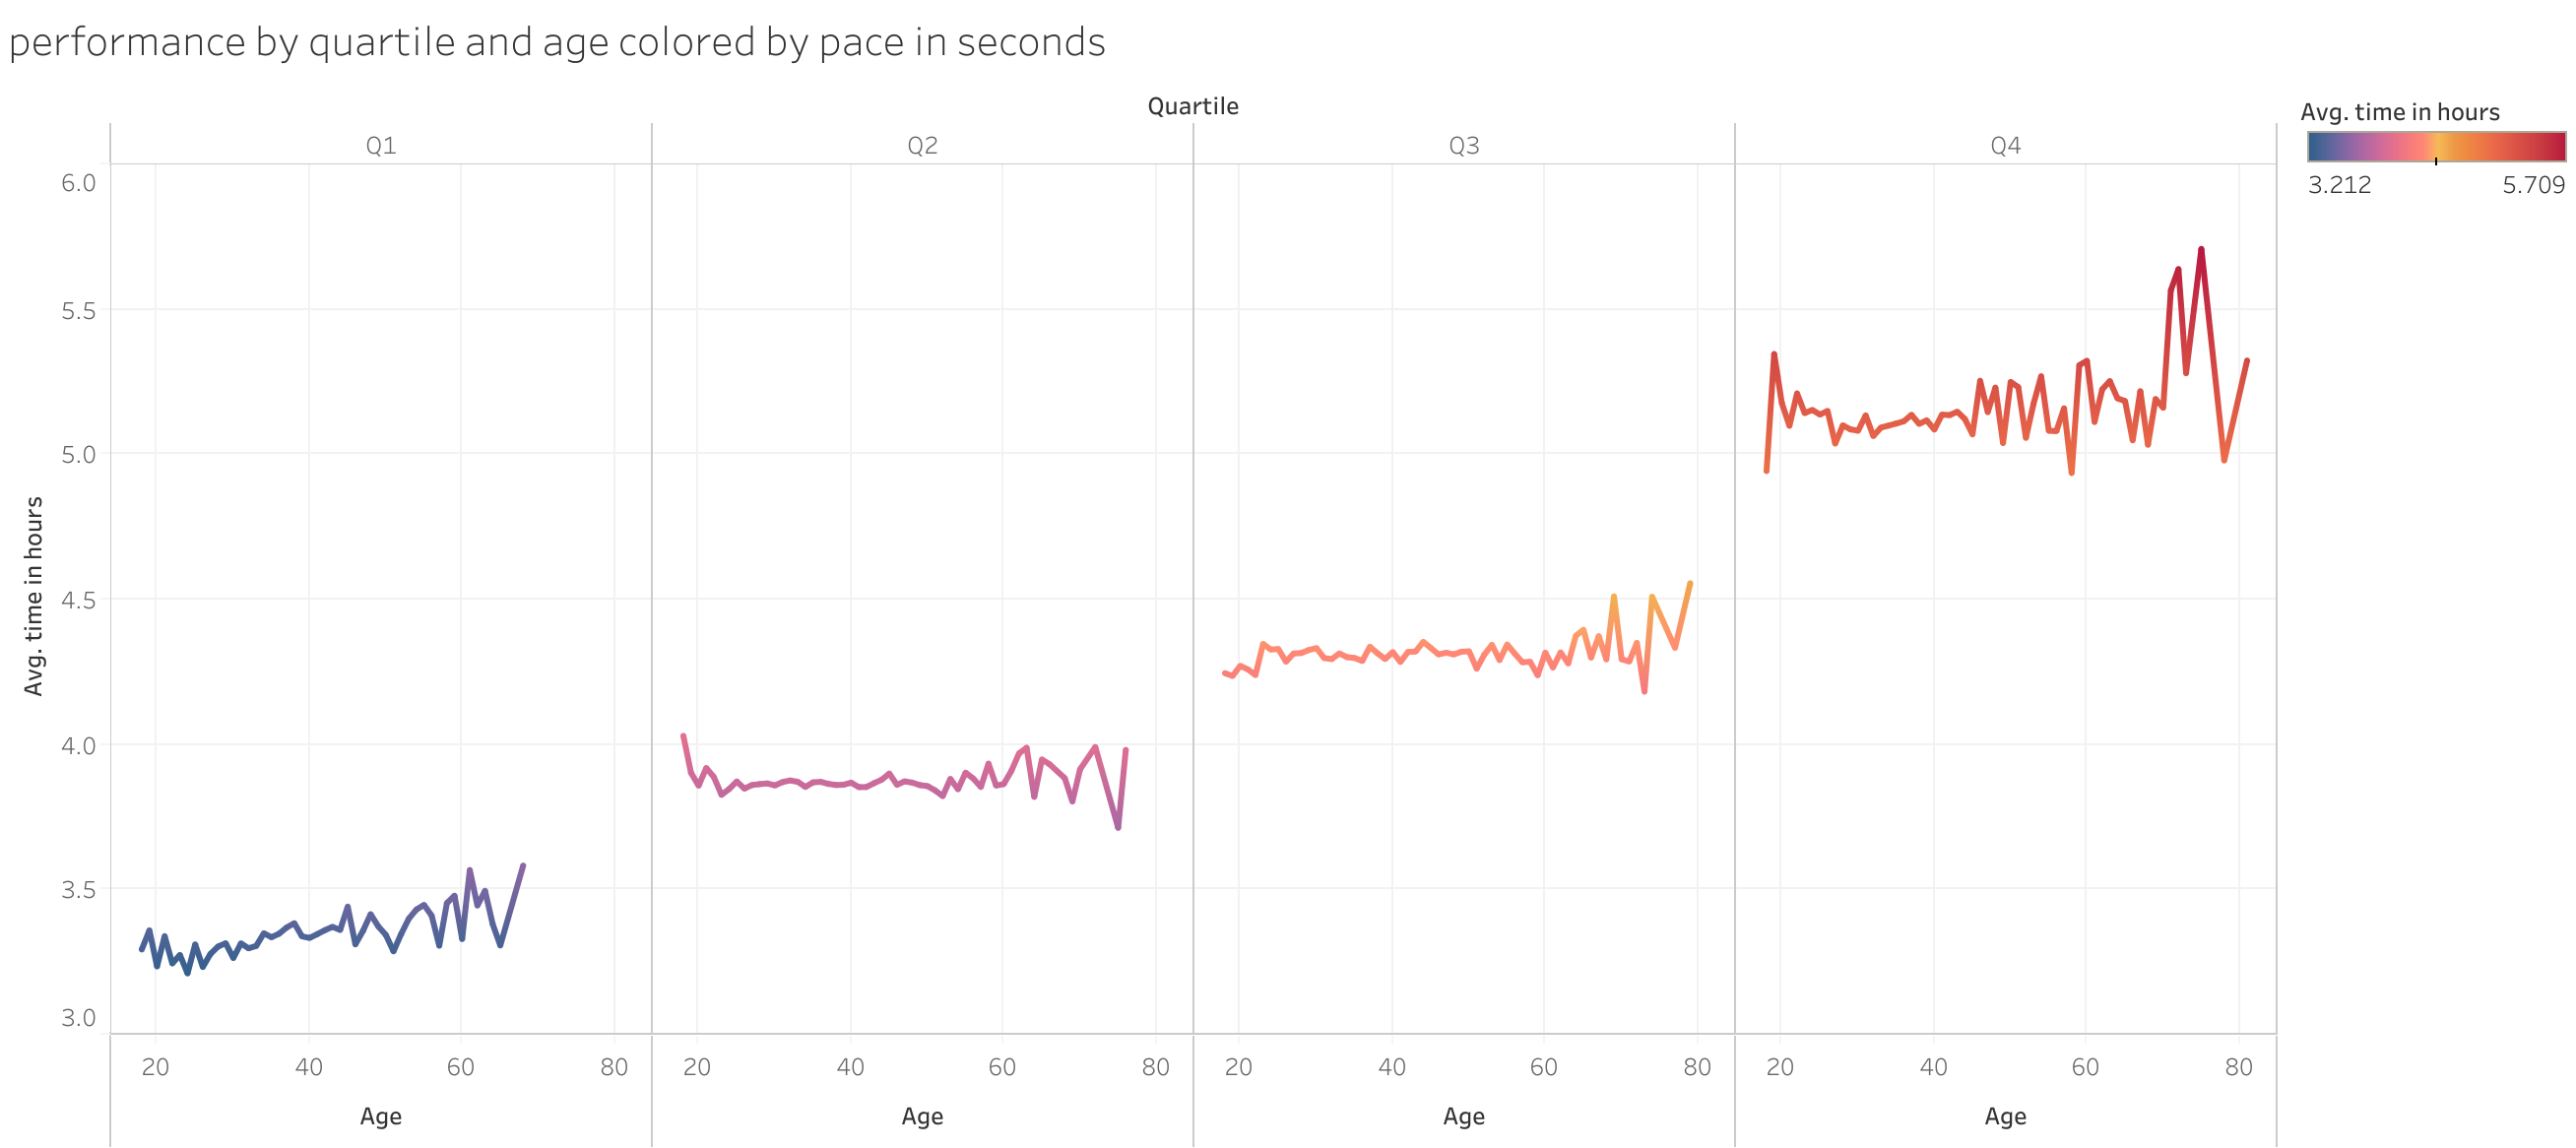

### **¿Es la edad realmente un factor decisivo?**

Echémosle un ojo 👀 

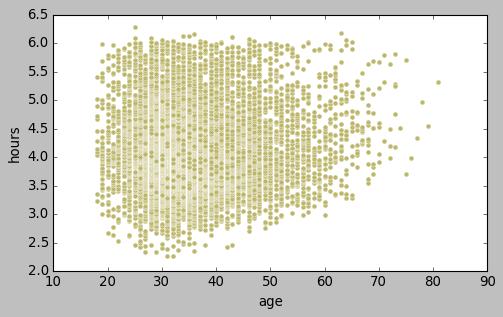

In [322]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=codes_mscw, x="age", y="time_hours",color='darkkhaki').set( ylabel='hours')
plt.show()

In [260]:
age_labels=['Dientes de leche(0-28)','Cancha Reglamentaria(29-39)','WTF Happened(40-49)','Señora(50-60)','Botox/Bisturí(61-70)','Fruta para Pan(70+)']
bins=pd.cut(mscw['age'],bins=6,labels=age_labels).reset_index().set_index('index').rename(columns={'age':'age_range'})


In [261]:
age.to_csv('age.csv')

In [215]:
age=pd.concat((mscw,bins),axis=1)
pd.pivot_table(age,index='age_range',values=(('time_hours','age')),aggfunc={min, max, np.mean,np.std})

age                          time_hours            \
                            max       mean min       std        max      mean   
age_range                                                                       
Dientes de leche(0-28)       28  25.282163  18  2.530645   6.297778  4.204095   
Cancha Reglamentaria(29-39)  39  33.579362  29  3.035358   6.160556  4.110546   
WTF Happened(40-49)          49  43.724760  40  2.778067   6.111111  4.173286   
Señora(50-60)                60  53.956882  50  3.072999   6.027222  4.220260   
Botox/Bisturí(61-70)         70  64.360759  61  2.657086   6.191944  4.521145   
Fruta para Pan(70+)          81  74.050000  71  2.837252   5.813611  4.808153   

                                                 
                                  min       std  
age_range                                        
Dientes de leche(0-28)       2.331667  0.723213  
Cancha Reglamentaria(29-39)  2.256111  0.690183  
WTF Happened(40-49)          2.427222  0.704297  
Señora(50-60)                2.843056  0.726409  
Botox/Bisturí(61-70)         3.285556  0.680354  
Fruta para Pan(70+)          3.713056  0.671063

### Buscamos que la media de los grupos sea significativamente differente de la medía en general.  📈

 Recuerda que la media original es: **4.157781**

In [223]:
ztest(mscw['time_hours'], value=4.204095)

(-6.093653685152342, 1.103622802917605e-09)

In [224]:
ztest(mscw['time_hours'], value=4.110546)

(6.214918750393221, 5.135121389361988e-10)

In [225]:
ztest(mscw['time_hours'], value=4.173286)

(-2.0400047079668973, 0.041349856820062786)

In [226]:
ztest(mscw['time_hours'], value=4.220260)

(-8.220539845566616, 2.0258916303190897e-16)

In [227]:
ztest(mscw['time_hours'], value=4.521145)

(-47.80904231239309, 0.0)

In [228]:
ztest(mscw['time_hours'], value=5.813611)

(-217.8633601723374, 0.0)

### Hmmmm... 🤔

Si, todas son significativamente diferente pero no hay un sentido claro (positivo o negativo en los Z scores) ¿Entonces qué?

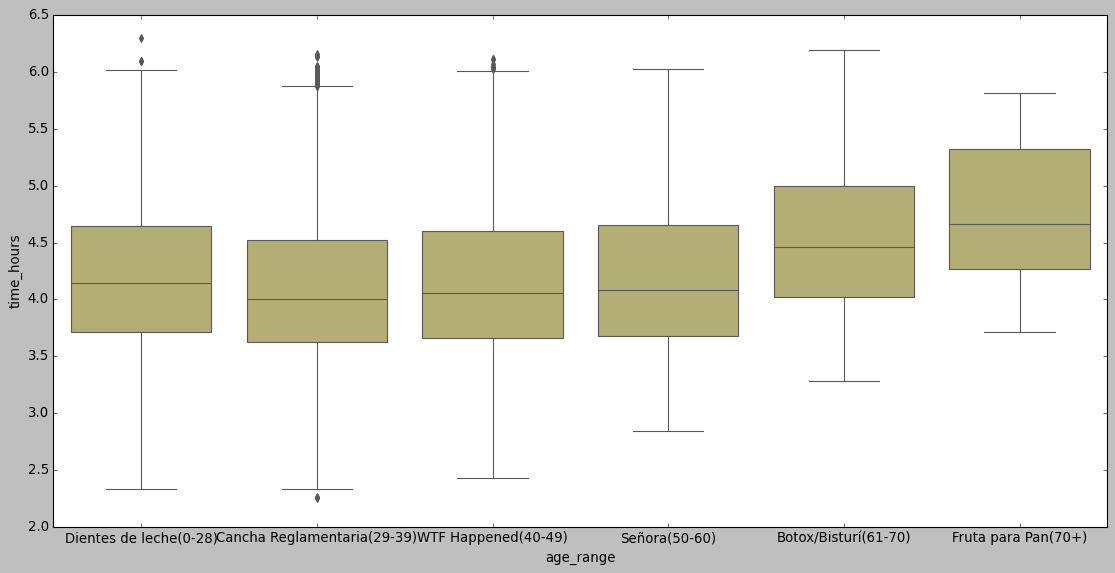

In [321]:
plt.figure(figsize=(17,8))
sns.boxplot(data=age, x="age_range", y="time_hours",color='darkkhaki')#.set(ylim=(0, 6.5), ylabel='Hours')
plt.show()

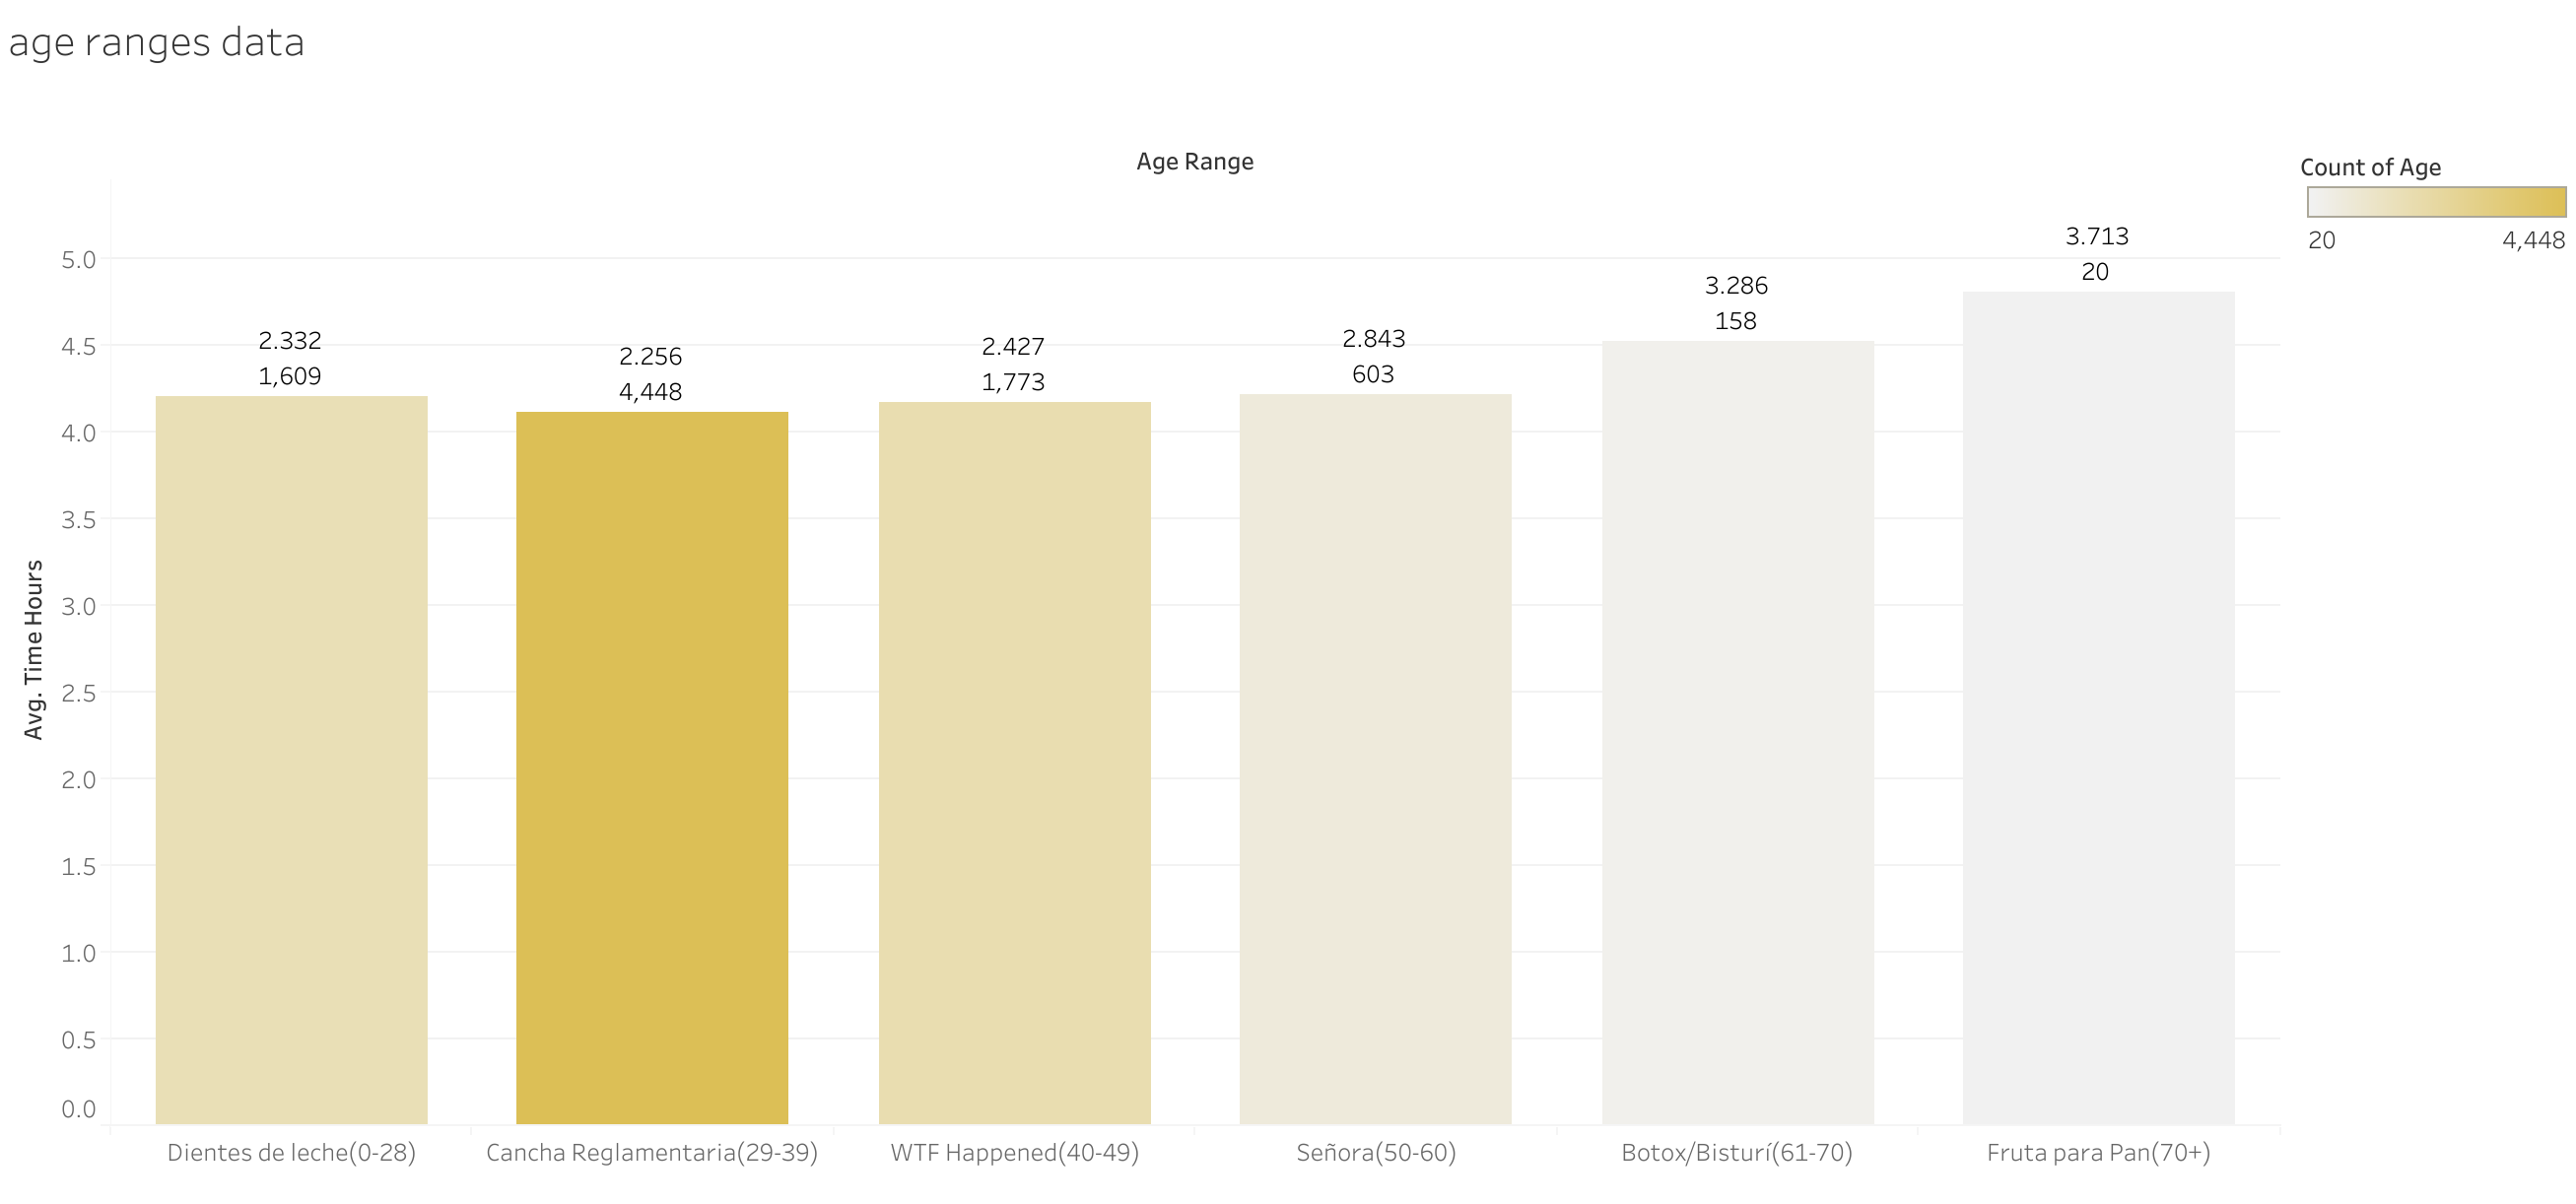

### Con este sample no podemos determinar que la edad tenga mucho que ver con el éxito en un maratón. 

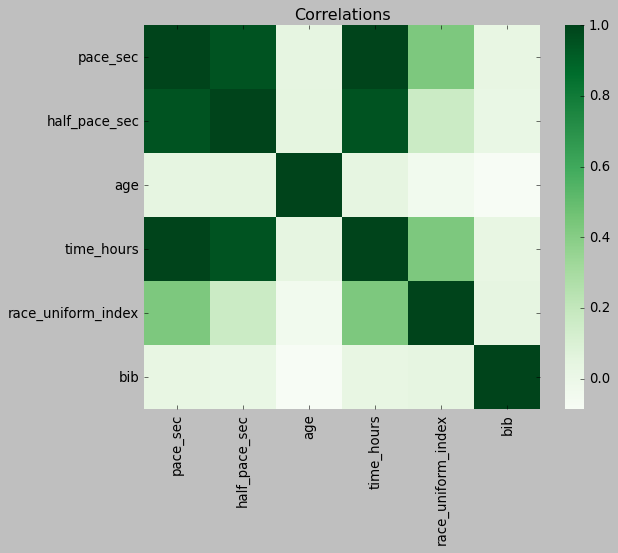

In [327]:
sns.heatmap(matrix,cmap="Greens")
plt.title('Correlations')
plt.show()

In [306]:
forcor=age[['pace_sec','half_pace_sec','age','time_hours','age_range','race_uniform_index','bib']]
forcor.to_csv('forcor.csv')
matrix=forcor.corr()

### RECAP 📝 

### 1. La edad tal vez no sea un gran factor determinante. Pero si lo fuera estoy en el rango preciso. Es ahora o nunca. 

### 2. El ritmo constante parece ser un factor común en los participantes con mayor éxito. 

### 3. Si eres al menos más rápido que la mitad de los participantes, deberias terminarlo en aproximadamente 4hrs y 9 minutos. Basado en mis entrenamientos hasta ahora. Lo más probable es que no sea más rápido que el 50%.  🥺

### More like the bottom 10%. At least in something I'm a 10-percenter. 😭 

### 4. Los mexicanos literal están en todos lados, osea había 5 mexas en Moscú. 🤦🏾‍♂️

# RESULTADOS FINALES 

## INDIVIDUALES

In [320]:
age.iloc[0:3][['name_en','age','age_range','time_hours']]

,name_en,age,age_range,time_hours
2,Stepan Kiselev,31,Cancha Reglamentaria(29-39),2.256111
10,Aleksey Troshkin,32,Cancha Reglamentaria(29-39),2.266944
8,Artem Aplachkin,27,Dientes de leche(0-28),2.331667


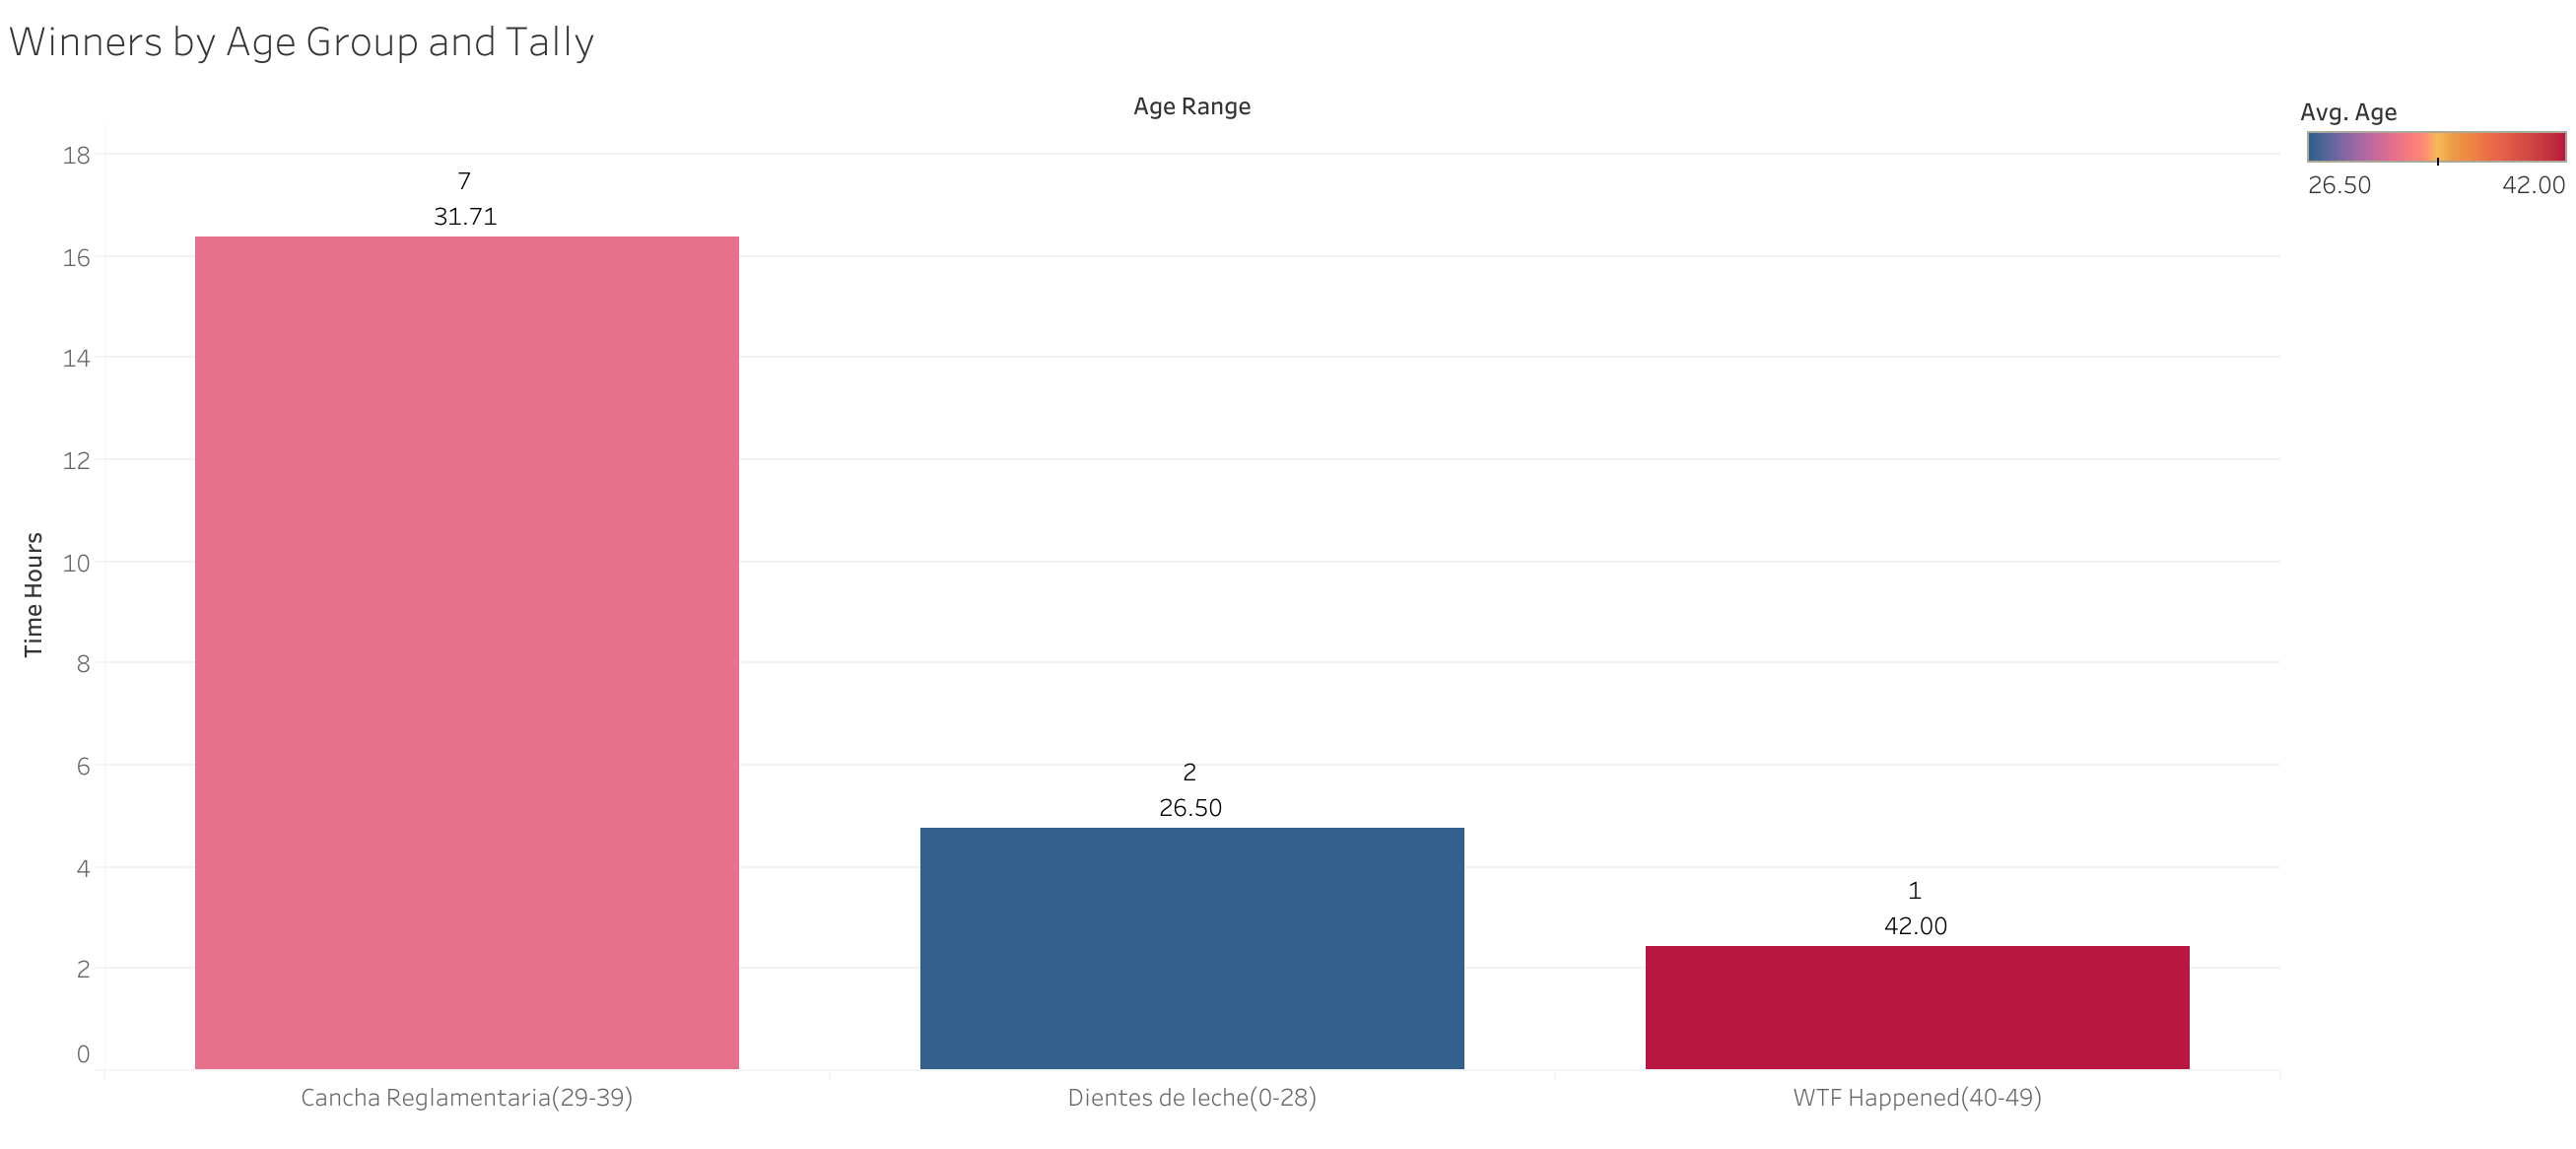

## POR PAÍS 🌍

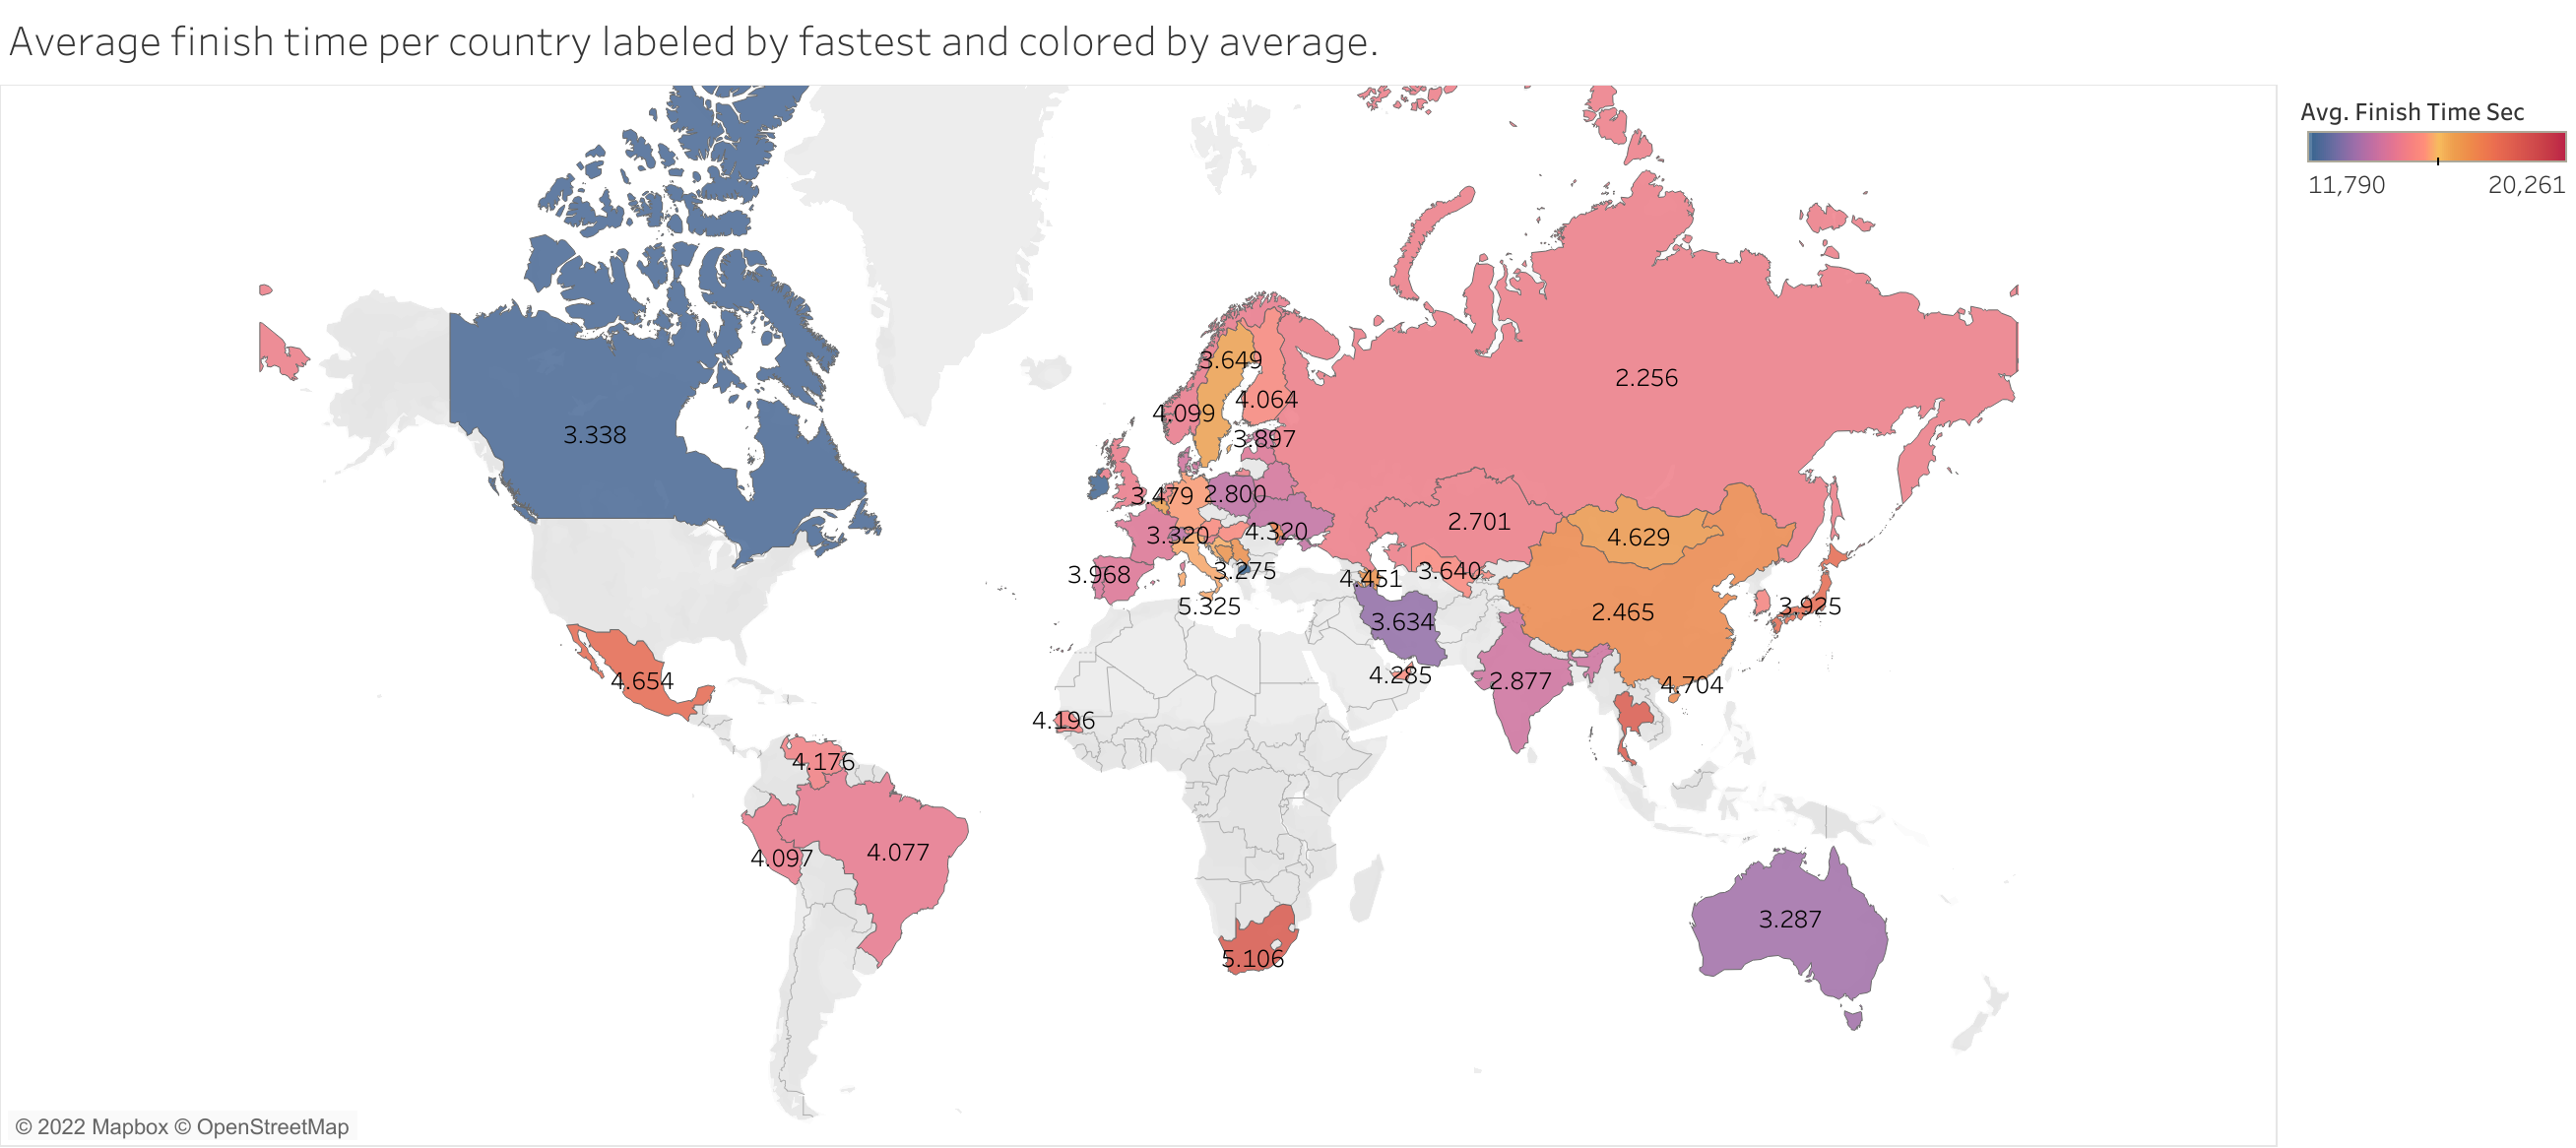

In [316]:
winners=age.iloc[0:10]
winners.to_csv('win.csv')

# Спасибо (Gracias!)